In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("activity_sleep_label.csv")
data

,EMAIL,DIAG_NM,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total
0,nia+003@rowan.kr,MCI,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,...,74.809524,75.492063,57.634921,65.253968,78.650794,54.904762,69.730159,0.022222,0.022222,23543.809524
1,nia+005@rowan.kr,CN,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,...,86.849558,89.345133,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,0.057434,28060.088496
2,nia+010@rowan.kr,MCI,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,...,97.931034,61.517241,63.758621,58.034483,76.965517,64.672414,58.344828,-0.045862,-0.045862,20247.413793
3,nia+013@rowan.kr,MCI,1.478484,493.147541,2577.590164,8769.811475,0.836066,481.016393,0.745902,314.918033,...,90.139344,97.606557,72.549180,88.073770,81.721311,36.295082,69.049180,0.008033,0.008033,23163.196721
4,nia+014@rowan.kr,MCI,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,...,94.764706,76.867647,55.500000,66.970588,82.500000,38.779412,63.573529,-0.129706,-0.129706,21879.264706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,nia+456@rowan.kr,CN,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,...,88.718750,85.031250,57.468750,42.156250,83.828125,31.234375,51.750000,-0.125469,-0.125469,18961.875000
170,nia+458@rowan.kr,CN,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,...,90.686275,88.882353,72.745098,67.705882,75.529412,82.607843,85.274510,-0.040000,-0.040000,28078.823529
171,nia+462@rowan.kr,MCI,1.595274,654.780488,2748.975610,12247.487805,3.121951,473.658537,0.560976,309.951220,...,90.073171,99.634146,71.121951,63.146341,85.317073,28.951220,68.634146,-0.037317,-0.037317,23045.121951
172,nia+475@rowan.kr,CN,1.397418,311.869565,2410.043478,5543.195652,0.108696,675.282609,1.130435,278.891304,...,57.130435,94.456522,68.130435,80.413043,85.913043,27.586957,54.695652,-0.159348,-0.159348,19752.391304


In [3]:
X = data.iloc[:,2:].to_numpy()
X

array([[ 1.26289683e+00,  2.02571429e+02,  2.20833333e+03, ...,
         2.22222222e-02,  2.22222222e-02,  2.35438095e+04],
       [ 1.37029867e+00,  2.17477876e+02,  1.77350442e+03, ...,
         5.74336283e-02,  5.74336283e-02,  2.80600885e+04],
       [ 1.39062500e+00,  2.59672414e+02,  2.36513793e+03, ...,
        -4.58620690e-02, -4.58620690e-02,  2.02474138e+04],
       ...,
       [ 1.59527439e+00,  6.54780488e+02,  2.74897561e+03, ...,
        -3.73170732e-02, -3.73170732e-02,  2.30451220e+04],
       [ 1.39741848e+00,  3.11869565e+02,  2.41004348e+03, ...,
        -1.59347826e-01, -1.59347826e-01,  1.97523913e+04],
       [ 1.33653846e+00,  2.90494505e+02,  2.32793407e+03, ...,
        -8.68131868e-03, -8.68131868e-03,  2.18571429e+04]])

In [4]:
y = data.iloc[:, 1].to_numpy()
y

array(['MCI', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'MCI', 'Dem', 'CN', 'MCI',
       'CN', 'CN', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'MCI', 'Dem', 'MCI',
       'CN', 'MCI', 'MCI', 'CN', 'MCI', 'Dem', 'MCI', 'MCI', 'CN', 'CN',
       'CN', 'MCI', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'CN', 'MCI', 'Dem',
       'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'MCI', 'CN',
       'Dem', 'CN', 'MCI', 'CN', 'MCI', 'MCI', 'MCI', 'MCI', 'CN', 'CN',
       'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'MCI', 'CN',
       'MCI', 'CN', 'Dem', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN', 'Dem',
       'CN', 'CN', 'CN', 'CN', 'CN', 'Dem', 'CN', 'CN', 'MCI', 'CN', 'CN',
       'MCI', 'MCI', 'CN', 'MCI', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN',
       'MCI', 'MCI', 'Dem', 'MCI', 'CN', 'MCI', 'Dem', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI',
       'CN', 'MCI', 'Dem', 'Dem', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'C

In [6]:
# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(len(X_train), len(X_test))

121 53


In [7]:
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

In [8]:
# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')

평균 = 4.194991461641501e-15, 표준편차= 1.0
평균 = -1.376309534659285e-16, 표준편차= 1.0
평균 = 2.7700523234242544e-15, 표준편차= 1.0
평균 = -9.909428649546852e-16, 표준편차= 1.0


In [9]:
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

평균 = 0.04308667606691483, 표준편차= 1.3702885101781923
평균 = 0.09668402413774949, 표준편차= 1.432583979708938
평균 = 0.044697400023375106, 표준편차= 1.3558715040071712
평균 = 0.06698873163511387, 표준편차= 1.4144734960004886


In [10]:
# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['CN' 'MCI' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'MCI'
 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'MCI' 'MCI' 'CN' 'CN' 'CN'
 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'Dem' 'CN'
 'CN' 'CN' 'MCI' 'MCI' 'MCI' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN']


In [12]:
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[29  1  4]
 [ 4  0  0]
 [12  0  3]]


In [13]:
report_without_pca = classification_report(y_test, y_pred)
print("Classification Report without PCA:\n", report_without_pca)

Classification Report without PCA:
               precision    recall  f1-score   support

          CN       0.64      0.85      0.73        34
         Dem       0.00      0.00      0.00         4
         MCI       0.43      0.20      0.27        15

    accuracy                           0.60        53
   macro avg       0.36      0.35      0.34        53
weighted avg       0.53      0.60      0.55        53



In [14]:
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

[0.5471698113207547, 0.39622641509433965, 0.39622641509433965, 0.37735849056603776, 0.39622641509433965, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.37735849056603776, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358, 0.3584905660377358]


In [15]:
min(errors)

0.3584905660377358

In [16]:
errors.index(min(errors))

5

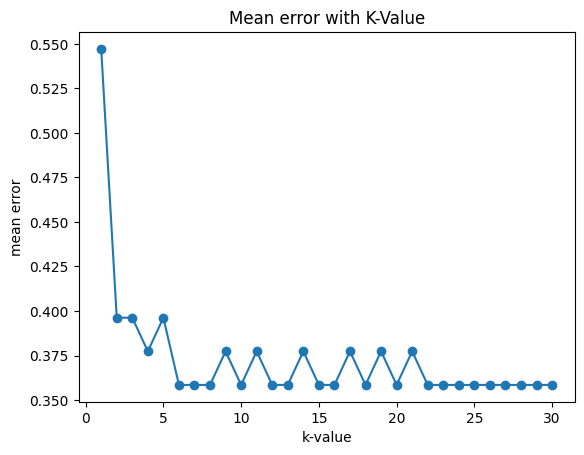

In [17]:
plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

### PCA

scree plot 그리기

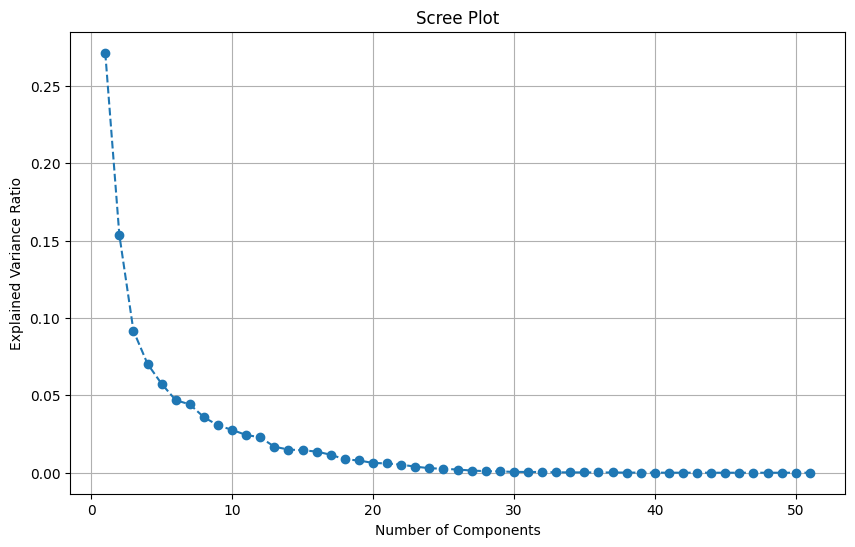

In [18]:
# Applying PCA without specifying the number of components to retain all components for scree plot
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train)

# Calculating the explained variance ratio for each principal component
explained_variance = pca_full.explained_variance_ratio_

# Creating the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


#### 1) 원본 데이터의 분산 95% 유지

In [19]:
# Applying PCA to reduce dimensionality while retaining 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # train 변환시 사용한 PCA와 동일한 PCA 사용

In [20]:
# Training and evaluating the KNN classifier with PCA
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [21]:
y_pred_pca = knn_pca.predict(X_test_pca)
report_with_pca = classification_report(y_test, y_pred_pca)
print("Classification Report with PCA:\n", report_with_pca)

Classification Report with PCA:
               precision    recall  f1-score   support

          CN       0.64      0.85      0.73        34
         Dem       0.00      0.00      0.00         4
         MCI       0.38      0.20      0.26        15

    accuracy                           0.60        53
   macro avg       0.34      0.35      0.33        53
weighted avg       0.52      0.60      0.54        53



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [22]:
# Print the number of components selected by PCA
print("Number of PCA components:", pca.n_components_)

Number of PCA components: 18


#### 2) PCA 개수를 미리 지정

In [23]:
# Applying PCA to reduce dimensionality while retaining 95% of variance
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # train 변환시 사용한 PCA와 동일한 PCA 사용

In [24]:
# Training and evaluating the KNN classifier with PCA
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [25]:
y_pred_pca = knn_pca.predict(X_test_pca)
report_with_pca = classification_report(y_test, y_pred_pca)
print("Classification Report with PCA:\n", report_with_pca)

Classification Report with PCA:
               precision    recall  f1-score   support

          CN       0.65      0.91      0.76        34
         Dem       0.00      0.00      0.00         4
         MCI       0.50      0.13      0.21        15

    accuracy                           0.62        53
   macro avg       0.38      0.35      0.32        53
weighted avg       0.56      0.62      0.54        53



In [26]:
# Print the number of components selected by PCA
print("Number of PCA components:", pca.n_components_)

Number of PCA components: 6


In [ ]:
### K 최적화 코드

# +) How do we determine optimal K-values of K-NN algorithm?
def optimal_k(X_train, y_train, X_test, y_test, max_k = 30):
    errors = []
    for i in range(1, max_k+1):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        errors.append(np.mean(pred_i != y_test))

    opt_k = errors.index(min(errors)) + 1
    
    plt.plot(range(1, max_k+1), errors, marker='o')
    plt.vlines(opt_k, 0, max(errors), color = "red", linestyles="--")
    plt.title('Mean error depending on K-Value')
    plt.xlabel('k-value')
    plt.xticks(np.arange(1, max_k+1))
    plt.ylabel('mean error')
    plt.figure(figsize=(20,6))
    plt.show()
    
    return opt_k

#### 모델별 PCA 전 후 비교: SVM, XGBoost

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [30]:
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

##### Visualize the performance

#### PCA를 하지 않을 때의 SVM Grid Search

Fitting 5 folds for each of 169 candidates, totalling 845 fits
[CV] END ................................C=0.01, gamma=1e-09; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-09; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-09; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-09; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-09; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-08; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-08; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-08; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-08; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-08; total time=   0.0s
[CV] END ................................C=0.01, gamma=1e-07; total time=   0.0s
[CV] END ................................C=0.0

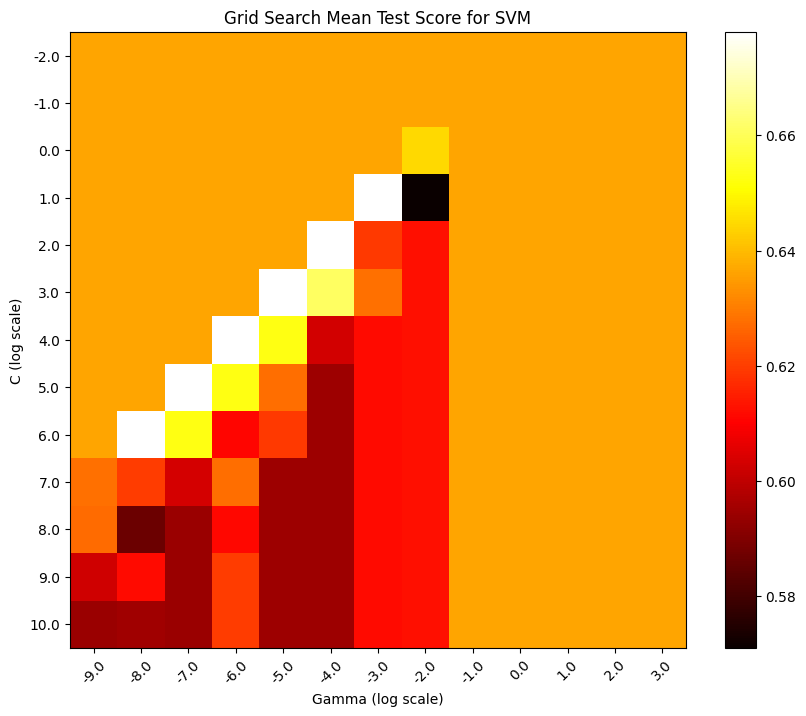

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.logspace(-9, 3, 13)
}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the scores from the grid search
scores = grid_search.cv_results_['mean_test_score']
scores_matrix = scores.reshape(13, 13)

# Plotting the scores
plt.figure(figsize=(10, 8))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Gamma (log scale)')
plt.ylabel('C (log scale)')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), np.round(np.log10(param_grid['gamma']), 2), rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), np.round(np.log10(param_grid['C']), 2))
plt.title('Grid Search Mean Test Score for SVM')
plt.show()


In [41]:
# Extracting the best score and corresponding gamma, C values from the grid search results

# Create a list of all combinations of gamma and C with their corresponding scores
comb_scores = [(score, params['gamma'], params['C']) for score, params in zip(scores, grid_search.cv_results_['params'])]

# Sort the combinations by score in descending order
sorted_comb_scores = sorted(comb_scores, key=lambda x: x[0], reverse=True)

# Extract the top 5 combinations
top_5_combinations = sorted_comb_scores[:50]

# Print the top 5 combinations
for i, (score, gamma, C) in enumerate(top_5_combinations, start=1):
    print(f"Rank {i}: Score = {score}, Gamma = {gamma}, C = {C}")


Rank 1: Score = 0.6779999999999999, Gamma = 0.001, C = 10.0
Rank 2: Score = 0.6779999999999999, Gamma = 0.0001, C = 100.0
Rank 3: Score = 0.6779999999999999, Gamma = 1e-05, C = 1000.0
Rank 4: Score = 0.6779999999999999, Gamma = 1e-06, C = 10000.0
Rank 5: Score = 0.6779999999999999, Gamma = 1e-07, C = 100000.0
Rank 6: Score = 0.6779999999999999, Gamma = 1e-08, C = 1000000.0
Rank 7: Score = 0.6609999999999999, Gamma = 0.0001, C = 1000.0
Rank 8: Score = 0.6526666666666666, Gamma = 1e-05, C = 10000.0
Rank 9: Score = 0.6526666666666666, Gamma = 1e-06, C = 100000.0
Rank 10: Score = 0.6526666666666666, Gamma = 1e-07, C = 1000000.0
Rank 11: Score = 0.6446666666666666, Gamma = 0.01, C = 1.0
Rank 12: Score = 0.6363333333333333, Gamma = 1e-09, C = 0.01
Rank 13: Score = 0.6363333333333333, Gamma = 1e-08, C = 0.01
Rank 14: Score = 0.6363333333333333, Gamma = 1e-07, C = 0.01
Rank 15: Score = 0.6363333333333333, Gamma = 1e-06, C = 0.01
Rank 16: Score = 0.6363333333333333, Gamma = 1e-05, C = 0.01
Rank

#### PCA 후 SVM 최적화

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.logspace(-9, 3, 13)
}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

X_test_pca 

# Retrieve the scores from the grid search
scores = grid_search.cv_results_['mean_test_score']
scores_matrix = scores.reshape(13, 13)

# Plotting the scores
plt.figure(figsize=(10, 8))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Gamma (log scale)')
plt.ylabel('C (log scale)')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), np.round(np.log10(param_grid['gamma']), 2), rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), np.round(np.log10(param_grid['C']), 2))
plt.title('Grid Search Mean Test Score for SVM')
plt.show()


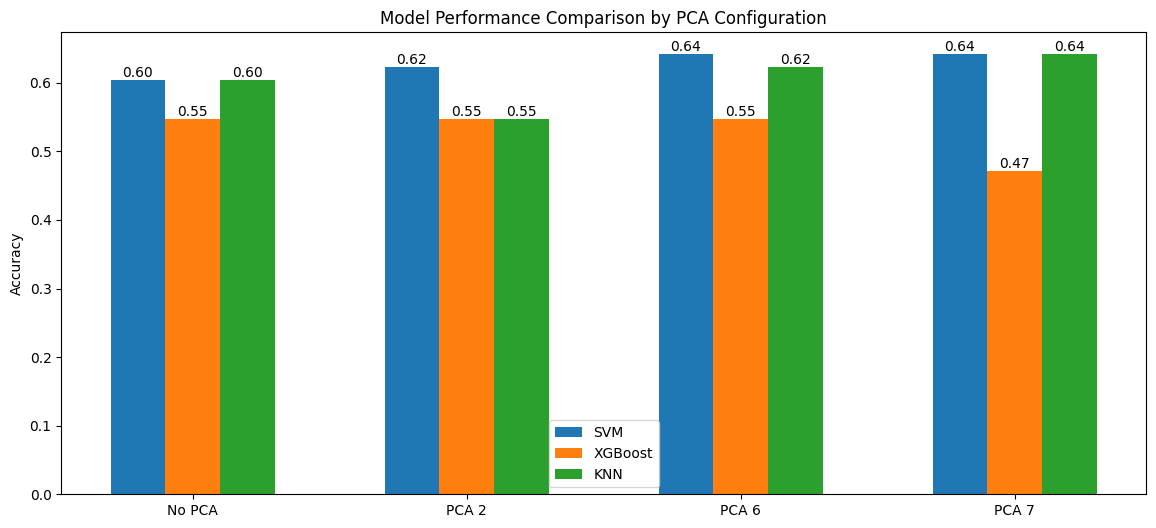

In [44]:
# Adjusting the code to include the performance comparison without PCA as well
n_components_list = [None, 2, 6, 7]  # Including None for the case without PCA
svm_accuracies = []
xgb_accuracies = []
knn_accuracies = []

for n_components in n_components_list:
    # Applying PCA with the current number of components (if not None)
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else:
        # Use original data without PCA
        X_train_pca, X_test_pca = X_train, X_test

    # Initialize models
    svm = SVC()
    xgb = GradientBoostingClassifier()
    knn = KNeighborsClassifier()

    # Train models
    svm.fit(X_train_pca, y_train)
    xgb.fit(X_train_pca, y_train)
    knn.fit(X_train_pca, y_train)

    # Evaluate models and store accuracies
    svm_acc_pca = accuracy_score(y_test, svm.predict(X_test_pca))
    xgb_acc_pca = accuracy_score(y_test, xgb.predict(X_test_pca))
    knn_acc_pca = accuracy_score(y_test, knn.predict(X_test_pca))

    svm_accuracies.append(svm_acc_pca)
    xgb_accuracies.append(xgb_acc_pca)
    knn_accuracies.append(knn_acc_pca)

# Visualize the performance comparison

# Data preparation for visualization
models = ['No PCA'] + [f'PCA {n}' for n in n_components_list[1:]]

# Create the plot
plt.figure(figsize=(14, 6))
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

bars1 = plt.bar(x - width, svm_accuracies, width, label='SVM')
bars2 = plt.bar(x, xgb_accuracies, width, label='XGBoost')
bars3 = plt.bar(x + width, knn_accuracies, width, label='KNN')

# Add text for labels, title and axes ticks
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison by PCA Configuration')
plt.xticks(x, models)
plt.legend()

# Adding the accuracy values on top of the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()